## Madrid Property Analysis

Life cycle of Machine learning Project
- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model

#### 1) Problem statement
- This project uses the provided dataset to estimate property prices in Madrid, with a regression model using algorithms seen in class. Then the problem is redifined to create a classification problem. 

#### 2) Data Collection
- Dataset Source - The dataset was provided to us and is located in the data/raw directory. 
- The data consists of 17857 rows and 26 columns.

##### 2.1 Import Data and Required Packages

Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import openpyxl
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

/var/folders/zs/bkn_y8hx4sz7ql3x3_swz8mm0000gn/T/ipykernel_2982/2649194681.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Import the Excel Data as Pandas DataFrame

In [2]:
df = pd.read_excel('../data/raw/session_7_dataset.xlsx')

Show Top 5 Records

In [3]:
df.head()

,Unnamed: 0,inm_floor,inm_size,inm_price,inm_longitude,inm_latitude,inm_barrio,inm_distrito,his_price,his_quarterly_variation,...,dem_TasaDeParo,dem_TamanoMedioDelHogar,dem_PropSinEstudiosUniversitarios,dem_PropSinEstudios,dem_Proporcion_de_nacidos_fuera_de_Espana,dem_PropConEstudiosUniversitarios,dem_PobTotal,dem_NumViviendas,dem_EdadMedia,dem_Densidad_(Habit/Ha)
0,0,3.0,141.0,990000,-3.656875,40.464347,Canillas,Hortaleza,3250,2.2,...,8.724674,2.527886,0.488949,0.175632,15.456193,NaN,40838,16155,NaN,161.894356
1,1,2.0,159.0,940000,-3.703523,40.419427,Universidad,Centro,5106,1.4,...,9.006094,1.975877,0.386598,0.083812,32.102460,0.529590,33418,16913,43.678945,352.500616
2,2,NaN,NaN,549000,-3.669626,40.435362,Guindalera,Salamanca,4100,0.6,...,7.441379,2.369951,0.365818,0.070351,18.224365,0.563831,42306,17851,46.477166,263.952286
3,3,2.0,232.0,750000,-3.720619,40.424164,Argüelles,Moncloa - Aravaca,4773,0.5,...,6.709633,2.328217,0.343683,0.066403,20.963846,0.589914,24423,10490,46.972342,322.402577
4,4,4.0,183.0,1550000,-3.705909,40.413214,Sol,Centro,4739,-5.5,...,9.058980,1.994244,0.433750,0.082242,39.490947,0.484009,7622,3822,44.632774,171.165183


Shape of the dataset

In [4]:
df.shape

(17857, 26)

##### 2.2 Dataset Information

 - Unnamed: 0: An index or identifier for the rows.
- inm_floor: The floor number on which the property is located.
- inm_size: The size of the property in square meters.
- inm_price: The listing price of the property.
- inm_longitude: The longitude coordinate of the property.
- inm_latitude: The latitude coordinate of the property.
- inm_barrio: The neighborhood name where the property is located.
- inm_distrito: The district name where the property is located.
- his_price: A historical pricing reference for the property.
- his_quarterly_variation: The change in price from the previous quarter.
- his_annual_variation: The change in price from the previous year.
- his_monthly_variation: The change in price from the previous month.
- dem_Indice_de_reemplazo_de_la_poblacion_activa: An index measuring the replacement rate of the working-age population.
- dem_Indice_de_juventud: An index measuring the youthfulness of the population.
- dem_Indice_de_estructura_de_la_poblacion_activa: An index reflecting the structure of the working-age population.
dem_Indice_de_dependencia: An index measuring the dependency ratio in the population.
- dem_TasaDeParo: The unemployment rate in the area.
- dem_TamanoMedioDelHogar: The average household size.
- dem_PropSinEstudiosUniversitarios: The proportion of the population without university-level education.
- dem_PropSinEstudios: The proportion of the population without any educational qualifications.
- dem_Proporcion_de_nacidos_fuera_de_Espana: The proportion of the population born outside of Spain.
- dem_PropConEstudiosUniversitarios: The proportion of the population with university-level education.
- dem_PobTotal: The total population in the area.
- dem_NumViviendas: The total number of dwellings in the area.
- dem_EdadMedia: The average age of the population in the area.
- dem_Densidad_(Habit/Ha): The population density per hectare in the area.



#### 3. Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

##### 3.1 Check Missing Values

In [5]:
df.isna().sum()

Unnamed: 0                                            0
inm_floor                                          3790
inm_size                                           1767
inm_price                                             0
inm_longitude                                         0
inm_latitude                                          0
inm_barrio                                         1794
inm_distrito                                       1747
his_price                                             0
his_quarterly_variation                               0
his_annual_variation                                  0
his_monthly_variation                                 0
dem_Indice_de_reemplazo_de_la_poblacion_activa        0
dem_Indice_de_juventud                                0
dem_Indice_de_estructura_de_la_poblacion_activa       0
dem_Indice_de_dependencia                             0
dem_TasaDeParo                                        0
dem_TamanoMedioDelHogar                         

Here's how we will take care of the missing values
If there were a few or a small portion of values missing, we could delete them, however as the missing values are a large portion, we will do the following. 

- Mean / Median Imputation: For the numerical values, the mean/median imputation is one of the best techniques. Choosing which one from those will depend on how the data is skewed/ with outliers, (we will make a boxplot to visalize that)

- For categorical values, we can fill with placeholders. 


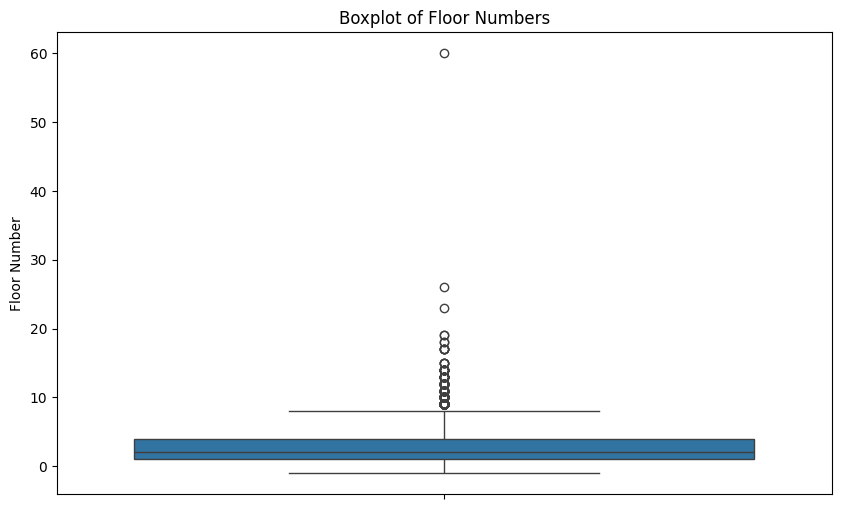

In [6]:
# Plotting the boxplot for the 'inm_floor' column
plt.figure(figsize=(10, 6))
sns.boxplot(y=df['inm_floor'])
plt.title('Boxplot of Floor Numbers')
plt.ylabel('Floor Number')
plt.show()

Given the presence of outliers, using the median to impute missing values would be a better choice because the median is not affected by these extreme values as much as the mean would be. We can do so with the following.

In [7]:
# Calculate the median of the 'inm_floor' column
floor_median = df['inm_floor'].median()

# Replace missing values with the median
df['inm_floor'].fillna(floor_median, inplace=True)

Size is also very important and as we have many missing values, we can also perform a check for that. Instead of checking for outliers now, we can check and see if the data is very skewed, indicating we would need to use median imputation. 

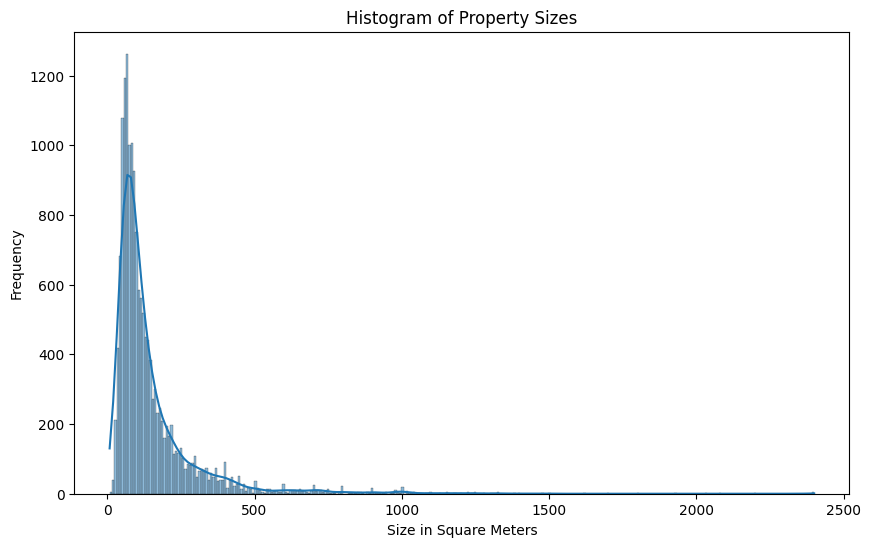

In [8]:
# Plotting the histogram for the 'inm_size' column
plt.figure(figsize=(10, 6))
sns.histplot(df['inm_size'], kde=True)
plt.title('Histogram of Property Sizes')
plt.xlabel('Size in Square Meters')
plt.ylabel('Frequency')
plt.show()

And as we can see, it appears to be very skewed, hence we will do median imputation. 

In [9]:
# Calculate the median of the 'inm_size' column
size_median = df['inm_size'].median()

# Replace missing values with the median
df['inm_size'].fillna(size_median, inplace=True)

For inm_barrio and inm_distrito, as they are categorical values, we will use placeholder values of Unknown to fill them. 

In [10]:
# Fill missing values with "Unknown"
df['inm_barrio'].fillna('Unknown', inplace=True)
df['inm_distrito'].fillna('Unknown', inplace=True)

When dealing with demographic proportions or populations, again median imputation is typically a good solution as its robust to outliers and skewed distributions. However, we will first check with boxplots for the features dem_PropConEstudiosUniversitarios and dem_EdadMedia. 

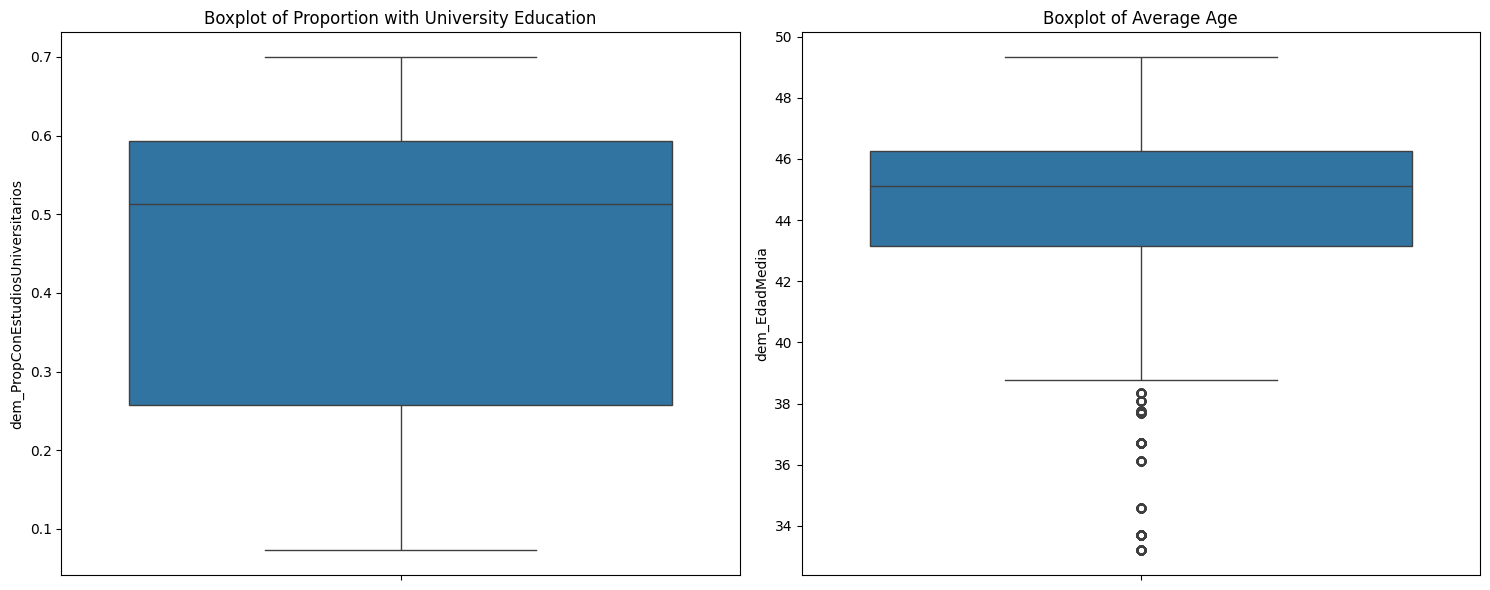

In [11]:
# Plotting boxplots for 'dem_PropConEstudiosUniversitarios' and 'dem_EdadMedia'
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Boxplot for 'dem_PropConEstudiosUniversitarios'
sns.boxplot(y=df['dem_PropConEstudiosUniversitarios'], ax=axes[0])
axes[0].set_title('Boxplot of Proportion with University Education')

# Boxplot for 'dem_EdadMedia'
sns.boxplot(y=df['dem_EdadMedia'], ax=axes[1])
axes[1].set_title('Boxplot of Average Age')

plt.tight_layout()
plt.show()

Based on above results, the first one doesn't have outliers and doesn't seem very skewed, so will use mean for that, and median for the second one.  

In [12]:
# Imputation for 'dem_PropConEstudiosUniversitarios' using the mean
prop_univ_mean = df['dem_PropConEstudiosUniversitarios'].mean()
df['dem_PropConEstudiosUniversitarios'].fillna(prop_univ_mean, inplace=True)

# Imputation for 'dem_EdadMedia' using the median
edad_media_median = df['dem_EdadMedia'].median()
df['dem_EdadMedia'].fillna(edad_media_median, inplace=True)

After completing all imputations and taking care of all missing values, we can do a final check to see that there are no missing values anymore. 

In [13]:
df.isna().sum()

Unnamed: 0                                         0
inm_floor                                          0
inm_size                                           0
inm_price                                          0
inm_longitude                                      0
inm_latitude                                       0
inm_barrio                                         0
inm_distrito                                       0
his_price                                          0
his_quarterly_variation                            0
his_annual_variation                               0
his_monthly_variation                              0
dem_Indice_de_reemplazo_de_la_poblacion_activa     0
dem_Indice_de_juventud                             0
dem_Indice_de_estructura_de_la_poblacion_activa    0
dem_Indice_de_dependencia                          0
dem_TasaDeParo                                     0
dem_TamanoMedioDelHogar                            0
dem_PropSinEstudiosUniversitarios             

Now we can move on to the next step.
#### 3.2 Check Duplicates

In [14]:
df.duplicated().sum()

0

There are no duplicates values in the data set

#### 3.3 Check data types


In [15]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17857 entries, 0 to 17856
Data columns (total 26 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Unnamed: 0                                       17857 non-null  int64  
 1   inm_floor                                        17857 non-null  float64
 2   inm_size                                         17857 non-null  float64
 3   inm_price                                        17857 non-null  int64  
 4   inm_longitude                                    17857 non-null  float64
 5   inm_latitude                                     17857 non-null  float64
 6   inm_barrio                                       17857 non-null  object 
 7   inm_distrito                                     17857 non-null  object 
 8   his_price                                        17857 non-null  int64  
 9   his_quarterly_variation     

#### 3.4 Checking the number of unique values of each column

In [16]:
df.nunique()

Unnamed: 0                                         17857
inm_floor                                             23
inm_size                                             675
inm_price                                           2340
inm_longitude                                      16013
inm_latitude                                       16104
inm_barrio                                           122
inm_distrito                                          22
his_price                                            120
his_quarterly_variation                               70
his_annual_variation                                  89
his_monthly_variation                                 57
dem_Indice_de_reemplazo_de_la_poblacion_activa       121
dem_Indice_de_juventud                               121
dem_Indice_de_estructura_de_la_poblacion_activa      121
dem_Indice_de_dependencia                            121
dem_TasaDeParo                                       121
dem_TamanoMedioDelHogar        

#### 3.5 Check statistics of data set

In [17]:
df.describe()

,Unnamed: 0,inm_floor,inm_size,inm_price,inm_longitude,inm_latitude,his_price,his_quarterly_variation,his_annual_variation,his_monthly_variation,...,dem_TasaDeParo,dem_TamanoMedioDelHogar,dem_PropSinEstudiosUniversitarios,dem_PropSinEstudios,dem_Proporcion_de_nacidos_fuera_de_Espana,dem_PropConEstudiosUniversitarios,dem_PobTotal,dem_NumViviendas,dem_EdadMedia,dem_Densidad_(Habit/Ha)
count,17857.000000,17857.000000,17857.000000,1.785700e+04,17857.000000,17857.000000,17857.000000,17857.000000,17857.000000,17857.000000,...,17857.000000,17857.000000,17857.000000,17857.000000,17857.000000,17857.000000,17857.000000,17857.000000,17857.000000,17857.000000
mean,8928.000000,2.548636,143.965799,6.964702e+05,-3.688064,40.424817,3993.643389,0.437918,-1.814499,0.035549,...,8.736896,2.487494,0.436518,0.124281,24.851753,0.439830,28281.995296,11515.008960,44.395055,233.372820
std,5155.016214,2.137757,153.098009,8.547274e+05,0.039164,0.031176,1589.895597,2.510048,3.847875,1.533065,...,3.042722,0.300608,0.109068,0.076923,8.542049,0.172195,13117.299282,5322.072109,2.706536,122.653928
min,0.000000,-1.000000,8.000000,1.600000e+04,-3.837697,40.328140,1290.000000,-16.100000,-11.600000,-5.200000,...,3.643735,1.975877,0.246480,0.036422,8.884988,0.072421,2398.000000,872.000000,33.198916,2.267773
25%,4464.000000,1.000000,69.000000,1.899000e+05,-3.708170,40.402633,2578.000000,-1.100000,-4.300000,-0.600000,...,6.291480,2.297491,0.340818,0.062095,18.746056,0.290539,18785.000000,8011.000000,43.271537,155.641754
50%,8928.000000,2.000000,98.000000,3.700000e+05,-3.692498,40.426586,4049.000000,0.500000,-2.200000,0.000000,...,8.076921,2.466320,0.391468,0.085268,23.400147,0.483665,25023.000000,10637.000000,45.113343,228.165728
75%,13392.000000,3.000000,154.000000,8.490000e+05,-3.669516,40.446864,5106.000000,1.900000,-0.100000,0.900000,...,10.802359,2.673612,0.551965,0.191202,31.219133,0.591390,36922.000000,15312.000000,46.234380,322.402577
max,17856.000000,60.000000,2400.000000,1.500000e+07,-3.545674,40.507659,8299.000000,12.200000,17.200000,8.100000,...,18.030112,3.506552,0.641264,0.355659,53.296248,0.699977,67418.000000,26836.000000,49.332035,460.612389


Insights

- Property Size (inm_size):

The average property size is approximately 143.97 square meters, with a median of 98 square meters.
The dataset includes properties as small as 8 square meters and as large as 2,400 square meters.

- Property Price (inm_price):

Property prices vary widely, with an average price of approximately €696,470.
The median price is €370,000, indicating that half of the properties are priced below this value.
The dataset includes properties with prices ranging from €16,000 to €15,000,000.

- Floor Numbers (inm_floor):

The average floor number is around 2.55, with a range from -1 (possibly basement) to 60 (possibly penthouse).
Most properties are on lower floors, as indicated by the median value of 2.

- Geographical Coordinates (inm_longitude and inm_latitude):

The dataset covers properties across different geographic locations within Madrid.
Longitude values range from approximately -3.837 to -3.546, and latitude values range from 40.328 to 40.508.

- Historical Price Trends (his_price):

Historical property prices exhibit fluctuations, with an average historical price of approximately €3,993.

- Demographic Information:

Average age (dem_EdadMedia) of the population is around 44.4 years.

- Proportion of the population with university education 

(dem_PropConEstudiosUniversitarios) averages around 43.98%.
Population density (dem_Densidad_(Habit/Ha)) varies widely, from approximately 2.27 to 460.61 inhabitants per hectare.

- Unemployment Rate (dem_TasaDeParo):

The average unemployment rate is approximately 8.74%.
Unemployment rates range from 3.64% to 18.03%, indicating regional variations.


#### 3.6 Exploring Data

In [18]:
df.head()

,Unnamed: 0,inm_floor,inm_size,inm_price,inm_longitude,inm_latitude,inm_barrio,inm_distrito,his_price,his_quarterly_variation,...,dem_TasaDeParo,dem_TamanoMedioDelHogar,dem_PropSinEstudiosUniversitarios,dem_PropSinEstudios,dem_Proporcion_de_nacidos_fuera_de_Espana,dem_PropConEstudiosUniversitarios,dem_PobTotal,dem_NumViviendas,dem_EdadMedia,dem_Densidad_(Habit/Ha)
0,0,3.0,141.0,990000,-3.656875,40.464347,Canillas,Hortaleza,3250,2.2,...,8.724674,2.527886,0.488949,0.175632,15.456193,0.439830,40838,16155,45.113343,161.894356
1,1,2.0,159.0,940000,-3.703523,40.419427,Universidad,Centro,5106,1.4,...,9.006094,1.975877,0.386598,0.083812,32.102460,0.529590,33418,16913,43.678945,352.500616
2,2,2.0,98.0,549000,-3.669626,40.435362,Guindalera,Salamanca,4100,0.6,...,7.441379,2.369951,0.365818,0.070351,18.224365,0.563831,42306,17851,46.477166,263.952286
3,3,2.0,232.0,750000,-3.720619,40.424164,Argüelles,Moncloa - Aravaca,4773,0.5,...,6.709633,2.328217,0.343683,0.066403,20.963846,0.589914,24423,10490,46.972342,322.402577
4,4,4.0,183.0,1550000,-3.705909,40.413214,Sol,Centro,4739,-5.5,...,9.058980,1.994244,0.433750,0.082242,39.490947,0.484009,7622,3822,44.632774,171.165183


In [19]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 24 numerical features : ['Unnamed: 0', 'inm_floor', 'inm_size', 'inm_price', 'inm_longitude', 'inm_latitude', 'his_price', 'his_quarterly_variation', 'his_annual_variation', 'his_monthly_variation', 'dem_Indice_de_reemplazo_de_la_poblacion_activa', 'dem_Indice_de_juventud', 'dem_Indice_de_estructura_de_la_poblacion_activa', 'dem_Indice_de_dependencia', 'dem_TasaDeParo', 'dem_TamanoMedioDelHogar', 'dem_PropSinEstudiosUniversitarios', 'dem_PropSinEstudios', 'dem_Proporcion_de_nacidos_fuera_de_Espana', 'dem_PropConEstudiosUniversitarios', 'dem_PobTotal', 'dem_NumViviendas', 'dem_EdadMedia', 'dem_Densidad_(Habit/Ha)']

We have 2 categorical features : ['inm_barrio', 'inm_distrito']


We can remove the columns that we do not need, such as the Unnamed: 0, which simply stores the index. 

In [20]:
df = df.drop(columns=['Unnamed: 0'])

To improve readability, we can also change the heading names to English

In [22]:
df.columns = [
    'floor',
    'size_sqm',
    'price',
    'longitude',
    'latitude',
    'neighborhood',
    'district',
    'historical_price',
    'quarterly_variation',
    'annual_variation',
    'monthly_variation',
    'demographic_replacement_rate',
    'demographic_youth_index',
    'demographic_active_population_structure_index',
    'demographic_dependency_rate',
    'demographic_unemployment_rate',
    'demographic_average_household_size',
    'demographic_proportion_without_university_education',
    'demographic_proportion_without_education',
    'demographic_proportion_born_outside_of_Spain',
    'demographic_proportion_with_university_education',
    'demographic_total_population',
    'demographic_number_of_homes',
    'demographic_average_age',
    'demographic_density'
]

In [23]:
df.head()

,floor,size_sqm,price,longitude,latitude,neighborhood,district,historical_price,quarterly_variation,annual_variation,...,demographic_unemployment_rate,demographic_average_household_size,demographic_proportion_without_university_education,demographic_proportion_without_education,demographic_proportion_born_outside_of_Spain,demographic_proportion_with_university_education,demographic_total_population,demographic_number_of_homes,demographic_average_age,demographic_density
0,3.0,141.0,990000,-3.656875,40.464347,Canillas,Hortaleza,3250,2.2,0.3,...,8.724674,2.527886,0.488949,0.175632,15.456193,0.439830,40838,16155,45.113343,161.894356
1,2.0,159.0,940000,-3.703523,40.419427,Universidad,Centro,5106,1.4,-4.3,...,9.006094,1.975877,0.386598,0.083812,32.102460,0.529590,33418,16913,43.678945,352.500616
2,2.0,98.0,549000,-3.669626,40.435362,Guindalera,Salamanca,4100,0.6,-4.1,...,7.441379,2.369951,0.365818,0.070351,18.224365,0.563831,42306,17851,46.477166,263.952286
3,2.0,232.0,750000,-3.720619,40.424164,Argüelles,Moncloa - Aravaca,4773,0.5,-3.7,...,6.709633,2.328217,0.343683,0.066403,20.963846,0.589914,24423,10490,46.972342,322.402577
4,4.0,183.0,1550000,-3.705909,40.413214,Sol,Centro,4739,-5.5,-5.3,...,9.058980,1.994244,0.433750,0.082242,39.490947,0.484009,7622,3822,44.632774,171.165183


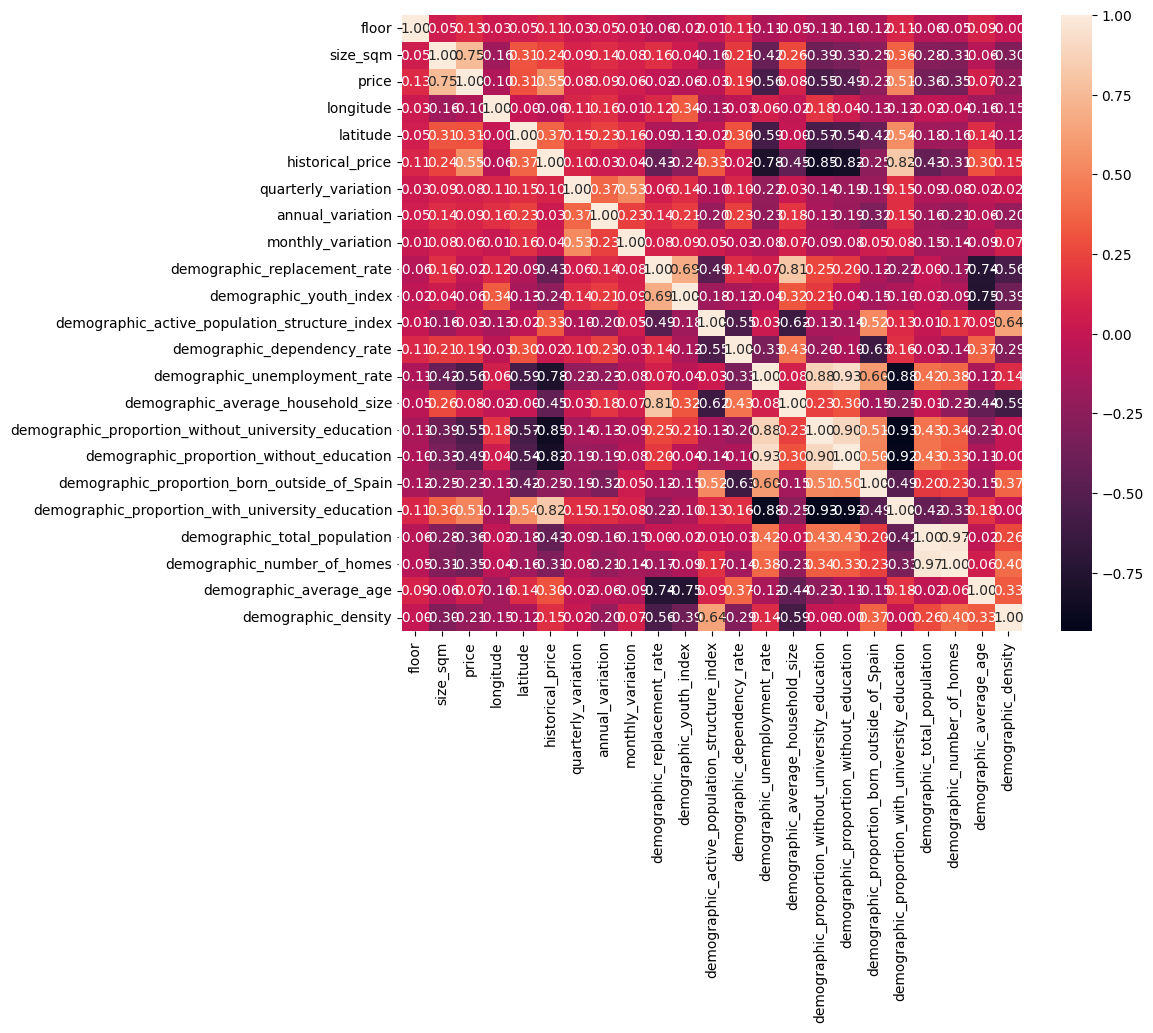

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only the numerical columns
numerical_df = df.select_dtypes(include=['number'])

# Compute the correlation matrix for numerical columns only
corr = numerical_df.corr()

# Generate a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f")
plt.show()


Converting Categorical to Numerical

In [29]:
# One-hot encoding for district
df = pd.get_dummies(df, columns=['district'])


In [32]:
from sklearn.feature_extraction import FeatureHasher

n_features = 10  # You can experiment with the number of features
hasher = FeatureHasher(n_features=n_features, input_type='string')

# Convert the 'neighborhood' column to an iterable of iterables (list of lists)
# where each inner list contains the string from the 'neighborhood' column
hashed_features = hasher.fit_transform(df['neighborhood'].astype(str).apply(lambda x: [x]))

hashed_features = pd.DataFrame(hashed_features.toarray())

# Concatenate hashed features with the original dataframe and drop the original 'neighborhood' column
df = pd.concat([df.drop('neighborhood', axis=1), hashed_features], axis=1)

In [43]:
print(df) 

       floor  size_sqm    price  longitude   latitude  historical_price  \
0        3.0     141.0   990000  -3.656875  40.464347              3250   
1        2.0     159.0   940000  -3.703523  40.419427              5106   
2        2.0      98.0   549000  -3.669626  40.435362              4100   
3        2.0     232.0   750000  -3.720619  40.424164              4773   
4        4.0     183.0  1550000  -3.705909  40.413214              4739   
...      ...       ...      ...        ...        ...               ...   
17852    0.0      28.0    94000  -3.705236  40.448713              3489   
17853    1.0     247.0  1250000  -3.797123  40.458962              3683   
17854    3.0      73.0   137260  -3.731940  40.377805              1859   
17855    5.0      72.0   304880  -3.704166  40.455556              3345   
17856    5.0     422.0  2490000  -3.678877  40.437514              5913   

       quarterly_variation  annual_variation  monthly_variation  \
0                      2.2      

In [27]:
df.to_csv('../data/processed/session_7_dataset.csv', index=False)